### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
avia_df = pd.read_csv('../data/2008.csv')

In [4]:
count = avia_df['UniqueCarrier'].value_counts()
top = count[:10]
top

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

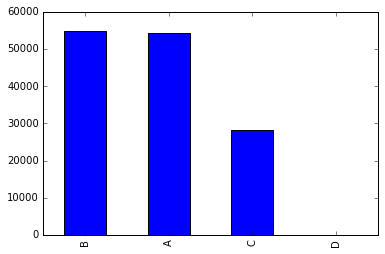

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
avia_df['CancellationCode'].value_counts().plot(kind = 'bar')

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [6]:
group = avia_df.groupby(['Origin','Dest'])
pop_dest = group.size().sort_values(ascending=False).iloc[:1]
pop_dest

Origin  Dest
SFO     LAX     13788
dtype: int64

In [7]:
group.get_group(('SFO','LAX')).describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [8]:
WeatherDelay = avia_df.groupby('FlightNum')['WeatherDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(avia_df[avia_df['FlightNum'] == WeatherDelay.index[i]][['FlightNum','UniqueCarrier', 'WeatherDelay']])

         FlightNum UniqueCarrier  WeatherDelay
1053561       9740            9E             0
2261496       9740            9E           NaN
3473458       9740            9E           NaN
4712701       9740            9E           NaN
4712702       9740            9E           NaN
4712703       9740            9E           NaN
4712704       9740            9E           NaN
4712705       9740            9E           NaN
4712706       9740            9E           NaN
4712707       9740            9E           NaN
4712708       9740            9E           NaN
5270757       9740            9E           NaN
6895888       9740            9E           NaN
6895889       9740            9E             0
6895890       9740            9E             0
6895891       9740            9E           NaN
6895892       9740            9E             0
6895893       9740            9E           NaN
6895894       9740            9E           NaN
6895895       9740            9E             0
6895896      

In [9]:
CarrierDelay = avia_df.groupby('FlightNum')['CarrierDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(avia_df[avia_df['FlightNum'] == WeatherDelay.index[i]][['FlightNum','UniqueCarrier', 'CarrierDelay']])

         FlightNum UniqueCarrier  CarrierDelay
1053561       9740            9E            25
2261496       9740            9E           NaN
3473458       9740            9E           NaN
4712701       9740            9E           NaN
4712702       9740            9E           NaN
4712703       9740            9E           NaN
4712704       9740            9E           NaN
4712705       9740            9E           NaN
4712706       9740            9E           NaN
4712707       9740            9E           NaN
4712708       9740            9E           NaN
5270757       9740            9E           NaN
6895888       9740            9E           NaN
6895889       9740            9E            74
6895890       9740            9E             0
6895891       9740            9E           NaN
6895892       9740            9E             0
6895893       9740            9E           NaN
6895894       9740            9E           NaN
6895895       9740            9E             0
6895896      

In [10]:
NASDelay = avia_df.groupby('FlightNum')['NASDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(avia_df[avia_df['FlightNum'] == WeatherDelay.index[i]][['FlightNum','UniqueCarrier', 'NASDelay']])

         FlightNum UniqueCarrier  NASDelay
1053561       9740            9E        30
2261496       9740            9E       NaN
3473458       9740            9E       NaN
4712701       9740            9E       NaN
4712702       9740            9E       NaN
4712703       9740            9E       NaN
4712704       9740            9E       NaN
4712705       9740            9E       NaN
4712706       9740            9E       NaN
4712707       9740            9E       NaN
4712708       9740            9E       NaN
5270757       9740            9E       NaN
6895888       9740            9E       NaN
6895889       9740            9E        20
6895890       9740            9E         0
6895891       9740            9E       NaN
6895892       9740            9E        17
6895893       9740            9E       NaN
6895894       9740            9E       NaN
6895895       9740            9E         4
6895896       9740            9E         0
6895897       9740            9E       NaN
         Fl

In [11]:
SecurityDelay = avia_df.groupby('FlightNum')['SecurityDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(avia_df[avia_df['FlightNum'] == WeatherDelay.index[i]][['FlightNum','UniqueCarrier', 'SecurityDelay']])

         FlightNum UniqueCarrier  SecurityDelay
1053561       9740            9E              0
2261496       9740            9E            NaN
3473458       9740            9E            NaN
4712701       9740            9E            NaN
4712702       9740            9E            NaN
4712703       9740            9E            NaN
4712704       9740            9E            NaN
4712705       9740            9E            NaN
4712706       9740            9E            NaN
4712707       9740            9E            NaN
4712708       9740            9E            NaN
5270757       9740            9E            NaN
6895888       9740            9E            NaN
6895889       9740            9E              0
6895890       9740            9E              0
6895891       9740            9E            NaN
6895892       9740            9E              0
6895893       9740            9E            NaN
6895894       9740            9E            NaN
6895895       9740            9E        

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1D4BFAB70>]], dtype=object)

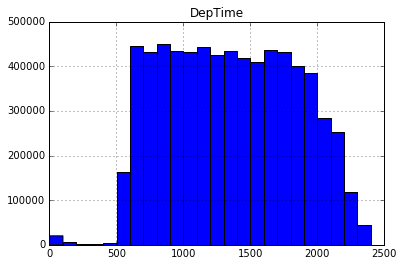

In [12]:
avia_df.hist('DepTime', bins=24)

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [13]:
avia_df['Date'] = pd.to_datetime(avia_df.Year*10000 + 
                                    avia_df.Month*100 + 
                                    avia_df.DayofMonth, 
                            format='%Y%m%d')
num_flights_by_date = avia_df.groupby('Date')['FlightNum'].agg('count')

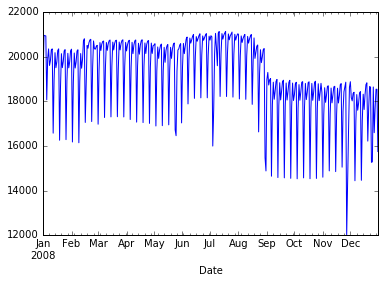

In [48]:
num_flights_by_date.plot()

### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [44]:
fbi_df1 = pd.read_csv('../data/table13.csv', thousands=',')
fbi_df2 = pd.read_csv('../data/table14.csv', thousands=',')

In [45]:
fbi_df1.columns

Index(['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population'],
      dtype='object')

In [46]:
fbi_df2.columns

Index(['State', 'Agency Type', 'Agency Name', 'Q1', 'Q2', 'Q3', 'Q4',
       'Population'],
      dtype='object')

In [47]:
unique1 = fbi_df1.drop_duplicates(subset='State')
unique2 = fbi_df2.drop_duplicates(subset='State')

In [48]:
unique1['State'].isin(unique2['State'])

0        True
4        True
5        True
26       True
46       True
275      True
323      True
371     False
373      True
384      True
425      True
432      True
444      True
482      True
497      True
506      True
536      True
613      True
619      True
636      True
656      True
734      True
875      True
914      True
916      True
936      True
948      True
958     False
963      True
979      True
1119     True
1122     True
1207     True
1255     True
1274     True
1385     True
1410     True
1428     True
1448     True
1455     True
1494     True
1502     True
1558     True
1608     True
1643     True
1653     True
1707     True
1787     True
1804     True
1825     True
Name: State, dtype: bool

**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [49]:
big_df = fbi_df1.append(fbi_df2)
big_df

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,39481,NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,84139,NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,35154,NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,94126,NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,299455,NaN,NaN,NaN,NaN,8,0,0,Alaska
5,1,0,0,NaN,NaN,NaN,Apache Junction,Cities,0,0,...,0,36626,NaN,NaN,NaN,NaN,1,0,0,Arizona
6,1,1,3,0,NaN,NaN,Avondale,Cities,0,1,...,0,78905,NaN,NaN,NaN,NaN,4,0,0,Arizona
7,0,1,0,0,NaN,NaN,Eagar,Cities,0,1,...,0,5034,NaN,NaN,NaN,NaN,0,0,0,Arizona
8,0,0,1,0,NaN,NaN,El Mirage,Cities,0,0,...,0,32837,NaN,NaN,NaN,NaN,1,0,0,Arizona
9,1,0,0,0,NaN,NaN,Gilbert,Cities,0,0,...,0,225232,NaN,NaN,NaN,NaN,1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [50]:
dropped = big_df.dropna(how='any')
dropped

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


Как мы видим, пропали все строки в большой таблице. Это произошло потому, что dropna() удаляет все строки, в которых есть значение "Nan", а в таблице они есть в каждой строке. Проблема исходит от изначального объединения фун-ей append(), которая, в случае различных столбцов двух таблиц, приписывает их в общую, но заполняет значениями NaN. Поэтому все строки заполнились такими значениями. Исправим имена первой таблицы, чтобы они совпадали у обеих таблиц.

In [51]:
fbi_df1.rename(columns={'Agency name':'Agency Name'}, inplace=True)
fbi_df1.rename(columns={'Agency type':'Agency Type'}, inplace=True)
fbi_df1.rename(columns={'1st quarter':'Q1'}, inplace=True)
fbi_df1.rename(columns={'2nd quarter':'Q2'}, inplace=True)
fbi_df1.rename(columns={'3rd quarter':'Q3'}, inplace=True)
fbi_df1.rename(columns={'4th quarter':'Q4'}, inplace=True)

In [52]:
new_big = fbi_df1.append(fbi_df2)
new_big

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,39481,0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,84139,0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,35154,1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,94126,0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,299455,2,3,3,0,8,0,0,Alaska
5,Apache Junction,Cities,0,0,0,0,36626,1,0,0,NaN,1,0,0,Arizona
6,Avondale,Cities,0,1,0,0,78905,1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,5034,0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,32837,0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,225232,1,0,0,0,1,0,0,Arizona


In [53]:
finally_dropped = new_big.dropna(how='any')
finally_dropped

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,39481,0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,84139,0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,35154,1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,94126,0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,299455,2,3,3,0,8,0,0,Alaska
6,Avondale,Cities,0,1,0,0,78905,1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,5034,0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,32837,0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,225232,1,0,0,0,1,0,0,Arizona
10,Glendale,Cities,0,1,0,0,234006,2,0,3,2,2,3,1,Arizona


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [54]:
indexed_df = finally_dropped.set_index(['State', 'Agency Type'])
indexed_df

Agency Name  \
State         Agency Type                                                       
Alabama       Cities                                                 Florence   
              Cities                                                   Hoover   
              Cities                                               Prattville   
              Cities                                               Tuscaloosa   
Alaska        Cities                                                Anchorage   
Arizona       Cities                                                 Avondale   
              Cities                                                    Eagar   
              Cities                                                El Mirage   
              Cities                                                  Gilbert   
              Cities                                                 Glendale   
              Cities                                                 Maricopa   
              Cities                                                     Mesa   
              Cities                                                 Prescott   
              Cities                                               Scottsdale   
              Cities                                                    Tempe   
              Cities                                                   Tucson   
              Cities                                                     Yuma   
              Universities and Colleges           Northern Arizona University   
              Universities and Colleges                 University of Arizona   
Arkansas      Cities                                              Bentonville   
              Cities                                               Berryville   
              Cities                                                    Cabot   
              Cities                                                  England   
              Cities                                            Fairfield Bay   
              Cities                                               Fort Smith   
              Cities                                                   Gurdon   
              Cities                                                   Marion   
              Cities                                        North Little Rock   
              Cities                                               Pine Bluff   
              Cities                                                   Rogers   
...                                                                       ...   
Washington    Universities and Colleges  Washington State University, Pullman   
              Universities and Colleges         Western Washington University   
West_Virginia Cities                                            Barboursville   
              Cities                                                  Beckley   
              Cities                                               Buckhannon   
              Cities                                               Charleston   
              Cities                                                   Dunbar   
              Cities                                                 Fairmont   
              Cities                                               Huntington   
              Cities                                              Martinsburg   
              Cities                                               Morgantown   
              Cities                                              Moundsville   
              Cities                                                 Oak Hill   
              Cities                                                Wellsburg   
Wisconsin     Cities                                                   Algoma   
              Cities                                                 Appleton   
              Cities                                               Burlington   
              Ci

**Задание 5:** В Pandas можно итерировать по DataFrame! Изучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состоящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [57]:
sub_df = finally_dropped.loc[finally_dropped['State'].isin(['Washington', 'Arizona', 'Wisconsin'])]
grp_sub_df = list(sub_df.groupby(['State', 'Agency Type']))
for i, j in grp_sub_df:
    print(*i, j['Population'].sum())

Arizona Cities 2133316.0
Arizona Universities and Colleges 66214.0
Washington Cities 2702014.0
Washington Universities and Colleges 98584.0
Wisconsin Cities 1302106.0
Wisconsin Universities and Colleges 8668.0


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [66]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [59]:
honda_df = pd.read_csv('../data/accord_sedan_training.csv')

In [60]:
honda_df.columns

Index(['price', 'mileage', 'year', 'trim', 'engine', 'transmission'], dtype='object')

In [73]:
X = np.array([[1]*honda_df.shape[0], honda_df['mileage']]).T
X

array([[     1,  67697],
       [     1,  73738],
       [     1,  80313],
       [     1,  86096],
       [     1,  79607],
       [     1,  96966],
       [     1, 126150],
       [     1, 119255],
       [     1,  73513],
       [     1,  50649],
       [     1,  90000],
       [     1, 114340],
       [     1,  75270],
       [     1,  54685],
       [     1,  68480],
       [     1, 107290],
       [     1,  39144],
       [     1,  42893],
       [     1, 103650],
       [     1,  59100],
       [     1,  96404],
       [     1,  59466],
       [     1,  89692],
       [     1,  91486],
       [     1,  90256],
       [     1,  85976],
       [     1, 103833],
       [     1,  37378],
       [     1,  45414],
       [     1, 108590],
       [     1, 121435],
       [     1,  99904],
       [     1, 121896],
       [     1,  70193],
       [     1, 103927],
       [     1,  34216],
       [     1, 135766],
       [     1,  89350],
       [     1, 133721],
       [     1, 109034],


In [76]:
y = np.array(honda_df['price'])
y

array([14995, 11988, 11999, 12995, 11333, 10067,  8999, 10595, 13988,
       13990, 12998, 10975, 12989, 14590, 16120,  9880, 12991, 13495,
       11495, 12000, 12000, 14900, 10499, 11680, 12950, 13681, 10694,
       15991, 13995, 11999,  9995, 11995,  9968, 13475, 13900, 13995,
       10888, 12995,  8999, 10692,  7995,  9998, 12999, 12791, 13420,
        9488, 13250, 10642, 13999, 12599, 11995, 12595,  8495, 12950,
        9994,  8991, 12736, 15995, 15991,  9692,  9488, 12495, 12482,
       11900, 11757,  9878, 11988, 11995, 10988, 13637, 14888, 11995,
        7900, 11037, 12413, 15995, 14999,  9495, 16990, 13995, 12810,
        8500, 11949, 10288, 16595, 14995, 10490,  8980, 10995, 11991,
       12589,  9000,  9995, 11995, 12895, 14971, 12998, 12441, 13995,
       15995, 13000, 10988, 13219, 11988, 11995, 11274, 12995, 12988,
       13500, 13850,  7695,  7991,  8998, 13980, 12988, 12995, 12800,
       11990, 12998,  8995, 12977, 11991, 10995, 13995,  9686,  8988,
        8880, 11394,

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [69]:
from mpl_toolkits import mplot3d
import scipy.optimize as opt
import sympy
from sympy import symbols, diff
plt.style.use('ggplot')

%matplotlib inline

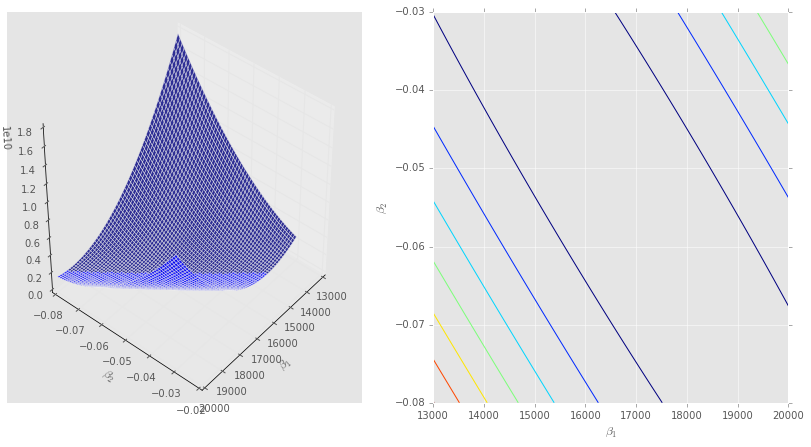

In [85]:
from sympy import *
b1 = Symbol('b1')  #коэфф-т для функционала L
b2 = Symbol('b2')  #аналогично
B = np.array([b1, b2])  
y1 = np.dot(X, B)
dev = y1 - y  #отклонение
L = 0

for i in dev:
    L += i**2

# Построение самой фун-ии по точкам
b_1 = np.linspace(13000, 20000, 600)
b_2 = np.linspace(-0.08, -0.03, 600)
B_1, B_2 = np.meshgrid(b_1,b_2)
func = lambdify([b1, b2], L, 'numpy')
final_plot = func(B_1, B_2)

figure = plt.figure(figsize=(14, 7))
ax = figure.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 40)
ax.plot_surface(B_1, B_2, final_plot, alpha=0.8)

ax.set_xlabel('$\\beta_{1}$')
ax.set_ylabel('$\\beta_{2}$')

ax = figure.add_subplot(1, 2, 2)
cont = ax.contour(B_1, B_2, final_plot)
ax.set_xlabel('$\\beta_{1}$')
ax.set_ylabel('$\\beta_{2}$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [100]:
#дифференциалы
db1 = L.diff(b1) 
db2 = L.diff(b2)

#частные произв-ые по коэф-ам
dLb1 =lambdify([b1, b2], db1)
dLb2 =lambdify([b1, b2], db2)

max_iter = 10000 #макс-ое кол-во итераций
alpha_b_1 = 0.000001 #скорость спуска
alpha_b_2 = 0.000000000000001
old_min_b_1 = 3
old_min_b_2 = 3
new_min_b_1 = 6
new_min_b_2 = 6
accuracy = 0.001 #точность
i = 0

while abs(new_min_b_1 - old_min_b_1) > accuracy or abs(new_min_b_2 - old_min_b_2) > accuracy and i<max_iter:
    old_min_b_1 = new_min_b_1
    old_min_b_2 = new_min_b_2
    act_b_1 = dLb1(new_min_b_1, new_min_b_2) * alpha_b_1
    act_b_2 = dLb2(new_min_b_1, new_min_b_2) * alpha_b_2
    new_min_b_1 = old_min_b_1 - act_b_1
    new_min_b_2 = old_min_b_2 - act_b_2
    i +=1

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [113]:
beta = [new_min_b_1, new_min_b_2]
beta

[16744.807134622468, -0.05195567986843333]

В данном случае Бета интерпретируется как цена, падающая на ~0.05, с ростом пробега

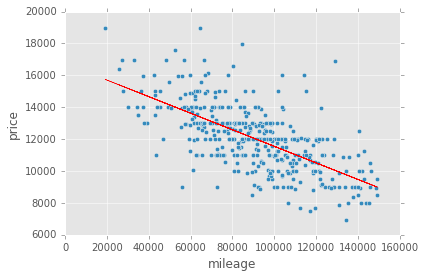

In [118]:
l = new_min_b_2
m = new_min_b_1
X = np.array(honda_df.iloc[:,1])[:,np.newaxis]
y = np.array(honda_df.iloc[:,0])[:,np.newaxis]
pts = np.hstack([X, y])
forecast = l*X + m
honda_df.plot(kind='scatter', x='mileage', y='price')
plt.plot(X, forecast, c='red', linewidth=0.5)